Sampling single mode initial states using methods presented in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033); errata [Olsen, Lewis-Swan, Bradley, Opt. Comm. 370 (2016) 327-328](https://doi.org/10.1016/j.optcom.2016.02.068)

We also sample some new distributions:
- fock state for +W
- thermal state for +P

More detailed errata for [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033)


In [1]:
using PhaseSpaceTools, PyPlot, QuadGK

In [11]:
?coherent

search: coherent cohere



```julia
a,ā = coherent(β,N;dist)
```

samples phase space distribution for coherent state

`β` is coherent amplitude (complex)

`N` is number of samples

`dist` is distrubtion. Can be either `+P` or `W`

For a coherent state in +P the distribution is just a point on the complex plane at the position of the coherent amplitude. Default (no value for dist) will give +P


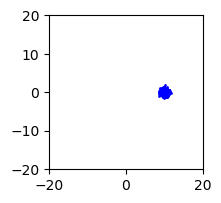

100.02973256521227 + 0.0im


In [10]:
b=10
N=1000
a,ā = coherent(b,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)

In [12]:
?thermal

search: thermal



```julia
a,ā = thermal(β,n̄,N;dist)
```

samples phase space distribution for a thermal state:

`β` is complex displacement

`n̄` is thermal average population

`N` is number of samples

`dist` is the distribution. Can be `P`, `Q` or `W`


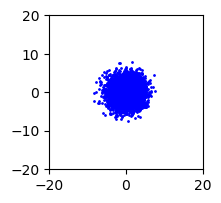

9.972234093900711 + 0.0im

In [13]:
a,ā = thermal(0,10,5000;dist="P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)

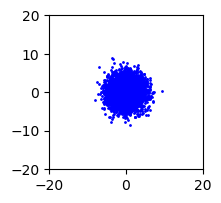

10.043010149114028 + 0.0im

In [14]:
a,ā = thermal(0,10,5000;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)-.5

In [15]:
?squeezed

search: squeezed squeeze



```julia
a,ā = squeezed(β,ϵ,N;dist)
```

samples phase space distribution for a squeezed state

`β` is coherent amplitude

`ϵ` is (complex) squeezing parameter

`N` is number of samples

`dist` is the distribution; can be `W` or `+P`


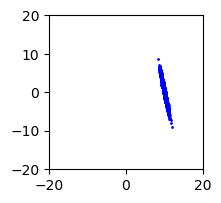

104.41974434602236 + 0.0im
104.53383099788888


In [16]:
β = 10
ϕ = π/16
r = 1.5
ϵ = r*exp(2*im*ϕ)
N = 5000
a,ā = squeezed(β,ϵ,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(sinh(abs(ϵ)).^2+abs2(β))

In [ ]:
β = 10
ϕ = π/16
r = 2
ϵ = r*exp(2*im*ϕ)
N = 100000
a,ā = squeezed(β,ϵ,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(real(mean(a.*ā)))
println(sinh(abs(ϵ)).^2+abs2(β))

In [17]:
?fock

search: fock foreach UniformScaling functionloc @functionloc



```julia
a,ā = fock(n,N;dist)
```

samples phase space distribution for a Fock state `n` is number of fock state

`N` is number of samples

`dist` is distribution. Can be either `W`, `+W`, or `+P`(default)


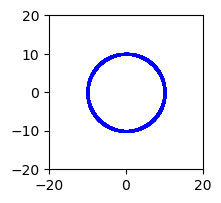

100.00082618357398 + 0.0im
100


In [18]:
n = 100
N = 100000
a,ā = fock(n,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(n)

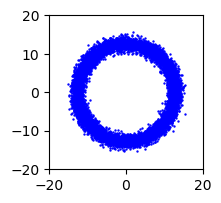

160.0572146735643 + 0.1454245399608646im
160


In [19]:
n = 160
N = 10000
a,ā = fock(n,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(n)

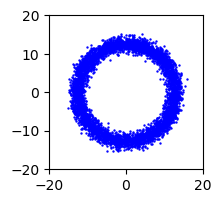

160.37802252479514 - 0.3040661648635648im
160


In [23]:
a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(n)

In [21]:
?crescent

search: crescent



```julia
a,ā = crescent(β,ϵ,q,N;dist)
```

Sample phase space distribution for a crescent state

`β` is coherent amplitude

`ϵ` is squeeze paramter

`q` is shearing parameter

`N` is number of samples

`dist` is distribution. Can be either `Q` or `+P`


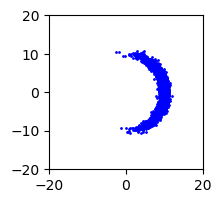

99.99272606237186 + 0.0im
100.0


In [24]:
β = 10
ϵ = 0
q = .5
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
#not quite the right moments for crescent state, but a sanity check of sorts:
println(sinh(abs(ϵ)).^2+abs2(β)) 

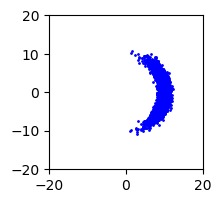

99.93170912253622 + 0.0im
100.0


In [25]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="Q")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-1)
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

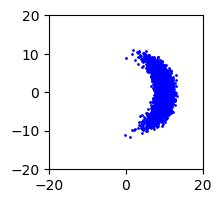

100.21205200743034 + 0.04283057437232887im
100.0


In [26]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

# Implement fock states for +W
- currently $|n\rangle$ limited to states with $n<=300$.
- asymptotic expansion should be possible for large $n$.

### Distribution to sample
Distribution 
$$P_n(x)=\frac{4}{3}e^{-2x^2/3}L_n(-4x^2/3)\frac{x}{3^n}$$ 
Using
$$L_n(-x)=\sum_{k=0}^n\binom{n}{k}\frac{x^k}{k!}$$
we have
$$P_n(x)=\frac{4x}{3^{n+1}}e^{-2x^2/3}\sum_{k=0}^n\binom{n}{k}\frac{(4x^2/3)^k}{k!}$$
Asymptotic expansion
$$L_n(-x)=\frac{e^{-x/2}}{2\sqrt{\pi}[xn]^{1/4}}e^{2\sqrt{xn}}$$
and hence
$$P_n(x)=\frac{4}{3}e^{-2x^2/3}L_n(-4x^2/3)\frac{x}{3^{n}}\longrightarrow \frac{4}{3}e^{-2x^2/3}\frac{e^{-2x^2/3}}{2\sqrt{\pi}[4x^2n/3]^{1/4}}e^{2\sqrt{4x^2/3n}}\frac{x}{3^{n}}$$
or 
$$P_n(x)\longrightarrow \frac{2}{3\sqrt{\pi}}\frac{e^{-(\sqrt{4x^2/3}-\sqrt{n})^2}}{[4x^2n/3]^{1/4}}\frac{xe^{n}}{3^{n}}$$

In [ ]:
using PyCall
import PhaseSpaceTools: reject, laguerre, PlaguerreN

In [36]:
weighted_hist(x; kws...) = PyPlot.plt[:hist](x; weights=ones(length(x))/length(x), kws...)

weighted_hist (generic function with 1 method)

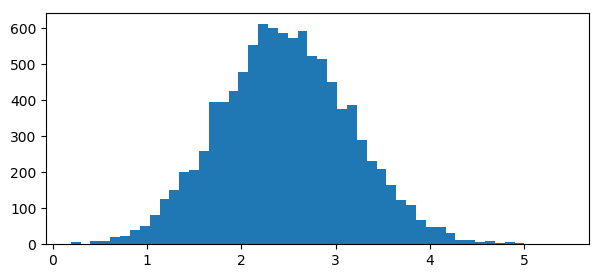

In [55]:
n=5
x1=max(0,sqrt(n)-5);x2=sqrt(n)+5
N=10000
Nb=50
a = reject(x->PlaguerreN.(x,n),[x1,x2],N,.71)
figure(figsize=(7,3))
b = weighted_hist(a,bins=Nb);

In [51]:
a,ā = fock(1,10000,dist="+W")

(Complex{Float64}[-2.26938-0.517161im, 0.482912-1.83253im, -0.948234-0.265985im, 1.79973-1.07593im, 1.51625-0.472509im, 3.06903+0.165196im, 0.190916-1.43074im, 0.623479-0.0299531im, 2.27276-0.252478im, 0.507485-0.575283im  …  0.0503395+1.47346im, -0.395367+1.30961im, -0.606322+2.35694im, 0.429223+1.31624im, 1.63697-0.354351im, 1.23425-0.37371im, -1.28138-0.124869im, -0.200037-0.0266289im, 1.43465-2.55706im, 1.95076-1.74135im], Complex{Float64}[-1.04327+0.784899im, 1.36349+1.16592im, -0.9369+1.55451im, 0.560238-1.11138im, -0.160814+1.06871im, 1.17503+0.317843im, -0.58523-1.39832im, 1.19246-0.143562im, 1.68499-0.984461im, 1.68589-0.861232im  …  -0.178123-0.847608im, 0.565862+0.000577232im, 1.4688+0.526737im, -0.753223+0.231972im, 2.19196+0.275703im, 1.29643+0.0081181im, -1.13846+1.3017im, 1.04456+0.42103im, 0.753463+0.198906im, 1.49881+2.65822im])

In [52]:
n̄ = mean(a.*ā)-.5

0.9612329221070299 - 0.02829761023050936im

In [ ]:
Vn = mean(a.^2.*ā.^2) - n̄ - n̄^2 #+P

In [ ]:
#other ways to call laguerre
@pyimport mpmath as mp
lagbig(x,n)=mp.laguerre(n,0,x)
#@pyimport scipy as sp
#@pyimport scipy.special as sps
#laguerre(x,n)=sps.eval_laguerre(n,x)